To properly render this notebook go to:
[nbviewer](https://nbviewer.jupyter.org/github/mtzoufras/probabilities/Consecutive_heads.ipynb)

###  <font color='red'>What is the probability P of getting N consecutive heads at least once in K tosses of a fair coin?</font>

__Quick answer:__ The exact result is $P=1-F_{K+2}^{(N)}/2^K$, where $F_{K+2}^{(N)}$ is the Fibonacci N-step number. For a good approximation I calculate $x = \frac{K-N+2}{2^{N+1}}$ and if $x\lesssim 0.1$ then $P\simeq x$, else $P\simeq 1-e^{-x}$.

__Corollary:__ This yields an approximate expression for the Fibonacci N-step number: $F_{K+2}^{(N)} \simeq 2^K \exp\left(-\frac{K-N+2}{2^{N+1}}\right)$

###  Introduction

This question shows up a lot online. For example:
* Quora: 
    * [Run of 5 in 11](https://www.quora.com/What-is-the-probability-of-getting-5-consecutive-heads-in-11-tosses-of-a-fair-coin) 
    * [Run of 5 in 10](https://www.quora.com/What-is-the-probability-of-getting-5-consecutive-heads-in-10-tosses-of-a-fair-coin)
* PhysicsForums: 
    * [Run of 15 in 40](https://www.physicsforums.com/threads/what-is-the-probability-of-getting-15-or-more-consecutive-heads-over-40-coin-tosses.331603/) 
* Math.StackExchange: 
    * [Run of 20 in 100](https://math.stackexchange.com/questions/417762/probability-of-20-consecutive-success-in-100-runs) 
    * [Run of 7 in 150](https://math.stackexchange.com/questions/4658/what-is-the-probability-of-a-coin-landing-tails-7-times-in-a-row-in-a-series-of)
* DrDobbs: 
    * [Run of 20 in 1,000,000](http://www.drdobbs.com/architecture-and-design/20-heads-in-a-row-what-are-the-odds/229300217)

The answer is usually given in terms of the [_Fibonacci N-step_](http://mathworld.wolfram.com/Fibonaccin-StepNumber.html) sequence. The derivation is straightforward (see the Appendix at the bottom) but since the Fibonacci is not an explicit function of the variables N and K the resulting formula is very opaque.  Here I will show a couple of simple semi-analytical (...) expressions and discuss their accuracy:
1. $P \simeq 1 - \exp\left(-\frac{K-N+2}{2^{N+1}}\right)$, with accuracy that generally improves with increasing $N,K$ 
2. If $\frac{K-N+2}{2^{N+1}}\ll 1$ then $P \simeq \frac{K-N+2}{2^{N+1}}$. 

Before proceeding let's see what these expressions predict for the aforementioned examples:

In [1]:
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff

def fiblike(start):
    """A function that returns a Fibonacci N-step function, where N
    is the length of the input list "start". Code from rosettacode.org"""
    addnum = len(start)
    memo = start[:]
    def fibber(n):
        try:
            return memo[n]
        except IndexError:
            ans = sum(fibber(i) for i in range(n-addnum, n))
            memo.append(ans)
            return ans
    return fibber

def Fibonacci_formatted(_N,_K):
    """Formatted result from Fibonacci(N,K) calculation for use below"""
    Fibonacci = fiblike([1] + [2**i for i in range(_N-1)])
    return '$'+str(float('%.4g' % (
        1-Fibonacci(_K+1)/float(2**_K)  ))*100.0)+'\%$'

def Taylor_formatted(_N,_K):
    """Formatted result from Taylor expansion for use below"""
    return '$'+str(float('%.4g' % ((_K-_N+2)/float(2**(_N+1))))*100.0)+'\%$'

def Exp_formatted(_N,_K):
    """Formatted result from Exponential expression for use below"""
    return '$'+str(float('%.4g' % (1-np.exp(-(_K-_N+2)/float(2**(_N+1)))  ))*100.0)+'\%$'

def Num_formatted(_Number):
    """Formatted float number as %"""
    return '$'+str(float('%.4g' % _Number) *100.0)+'\%$'

data_matrix = [['A rally of N heads in K coin flips',
                '$P=1-F_{K+2}^{(N)}/2^K$',
                '$\simeq 1 - e^{-(K-N+2)/2^{N+1}}$',
                '$\simeq (K-N+2)/2^{N+1}$'],
               ['$(5,11)$',  Fibonacci_formatted(5,11),  Exp_formatted(5,11),    Taylor_formatted(5,11)],
               ['$(5,10)$',  Fibonacci_formatted(5,10),  Exp_formatted(5,10),    Taylor_formatted(5,10)],
               ['$(15,40)$', Fibonacci_formatted(15,40), Exp_formatted(15,40),   Taylor_formatted(15,40)],
               ['$(20,100)$',Fibonacci_formatted(20,100),Exp_formatted(20,100),  Taylor_formatted(20,100)],
               ['$(7,150)$', Fibonacci_formatted(7,150), Exp_formatted(7,150),  'N/A'],
               ['$(20,10^6)$',Num_formatted(0.379253961),Exp_formatted(20,1e+6),'N/A'],
              ]

table = ff.create_table(data_matrix,colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']])
py.iplot(table)

The bottom two rows in the last column are 'N/A' because the ratio $\frac{K-N+2}{2^{N+1}}$ is not much smaller $1$:
* $(7,150)\rightarrow\frac{150-7+2}{2^{7+1}}\simeq 0.57$  
* $(20,10^6)\rightarrow\frac{10^6-20+2}{2^{20+1}}\simeq 0.48$


The Fibonacci calculation is expensive and for the last row I took the result directly from [DrDobbs](http://www.drdobbs.com/architecture-and-design/20-heads-in-a-row-what-are-the-odds/229300217) instead of evaluating it. The goal in this notebook is to demostrate the efficacy of the approximate expressions.

### Derivation of the semi-analytical model


_Consider:_
* A sequence of $K$ letters contains $K-N+1$ words of length $N$. 
* All possible binary words of length $N$, e.g.  $\underbrace{10101110}_{N=8}$, fit in a dictionary of $2^N$ words. 
* If one picks words randomly in search of a specific word, such as $\underbrace{11111\ldots}_{N-\text{times}}$, the probability of _not_ finding it is: $\left(1-\frac{1}{\text{size of dictionary}}\right)^{\text{# of words picked randomly}}$

Identifying words in a sequence of letters is different than picking words out of a hat. Suppose we flip a coin looking for words/rallies of $111$ and finally find the first one after tossing $110100\underline{111}$. There is a $\frac{1}{2}$ probability that if we toss again we will get a second rally back to back $1101001\underline{111}$, a $\frac{1}{4}$ probability for a third rally and so on. So the average number of rallies we can expect to have is [$2$](https://en.wikipedia.org/wiki/Zeno%27s_paradoxes); if we find one there will be one more (on average) back to back. Since the words/rallies in question appear in pairs they must be $\frac{1}{2}$ as common in the rest of the population so: 


Probability of _no_ rallies $\simeq \left(1-\frac{1}{\text{size of dictionary}}\right)^{\frac{\text{# of words in  sequence}}{2}}=\left(1-\frac{1}{2^N}\right)^{\frac{K-N}{2}+1}$

$\Rightarrow$ $\boxed{P \simeq 1-\left(1-\frac{1}{2^N}\right)^{\frac{K-N+2}{2}}}$

In [2]:
def SemiAnalytical_expression(_N,_Klist):
    """Semi-analytical calculation returns a list that enables plotting P(K)"""
    trials = float(2**(_N))
    return [1-(1-1.0/trials)**((_K-_N+2)/2.0) for _K in _Klist ]

When $1\ll 2^N$ we can use $e=\lim_{n\rightarrow\infty}\left(1+\frac{1}{n}\right)^n$ to rewrite:

$ \boxed{P \simeq 1 - \exp\left(-\frac{K-N+2}{2^{N+1}}\right),\quad \text{for}\quad 1\ll2^{N}}$

In [3]:
def Exponential_expression(_N,_Klist):
    """Exponential approximation returns a list that enables plotting P(K)"""
    trials = float(2**(_N+1))
    return [1-np.exp(-(_K-_N+2)/trials) for _K in _Klist ]

Finally, in the limit $(K-N+2)\ll2^{N+1}$ we can use the Taylor expansion $e^x\simeq 1+x$ to simplify $P$:

$ \boxed{P \simeq\frac{K-N+2}{2^{N+1}},\quad \text{for}\quad \frac{K-N+2}{2^{N+1}}\ll 1}$

In [4]:
def Taylor_expansion(_N,_Klist):
    """The Taylor expansion of the exponential returns a list that enables plotting P(K)"""
    trials = float(2**(_N+1))
    return [(_K-_N+2)/trials for _K in _Klist ]

### Stochastic matrix calculation

To verify the semi-analytical expressions above I  compare them with numerically calculated results obtained using the [Stochastic Matrix](https://en.wikipedia.org/wiki/Stochastic_matrix) method. This is an efficient approach that is often used to solve this problem, e.g. [Quora](https://www.quora.com/What-is-the-probability-of-getting-5-consecutive-heads-in-11-tosses-of-a-fair-coin). 

The function takes (N,K) as parameters and returns:

* K_list = [2,3,4,5,...,K] 

* P_list = List of probabilities for "i" coin tosses with "i" in K_list.

In [6]:
def Stochastic_Matrix_PvsN(_N,_K):
    """Stochastic matrix method"""
    
    # Initial state
    d0 = np.zeros(_N+1)
    d0[0] = 1.0
    
    # Initialize stochastic matrix
    M = np.zeros((_N+1,_N+1))
    for i in range(0,_N):
        M[0,i] = 0.5
        M[i+1,i] = 0.5
    M[_N,_N] = 1.0
    
    # Calculate probability for an N-length run
    Mn = np.copy(M)
    Plist = []
    Klist = range(2,_K+1)
    for i in Klist:
        Mn = np.matmul(Mn,M)
        Plist.append(  np.matmul(Mn,d0.T)[_N])
        
    return Plist, Klist 

### Comparison between semi-analytical model and numerical calculations

The parameters in the calculation are $N=5,10,20,30$ and $K=N+1,\ldots 10^6$.

In [7]:
Run_length = [5,10,20,30]
TotalTrials = 1000000

xaxis           = [None] * len(Run_length) 
Numerical       = [None] * len(Run_length)
SemiAnalytical  = [None] * len(Run_length)
Exponential     = [None] * len(Run_length)
TaylorExpansion = [None] * len(Run_length)

for i,run in enumerate(Run_length):
    Numerical[i], xaxis[i] = Stochastic_Matrix_PvsN(run, TotalTrials)
    SemiAnalytical[i] = SemiAnalytical_expression(run, xaxis[i])    
    Exponential[i] = Exponential_expression(run, xaxis[i])    
    TaylorExpansion[i] = Taylor_expansion(run, xaxis[i])    

Now let's plot the results:

In [8]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

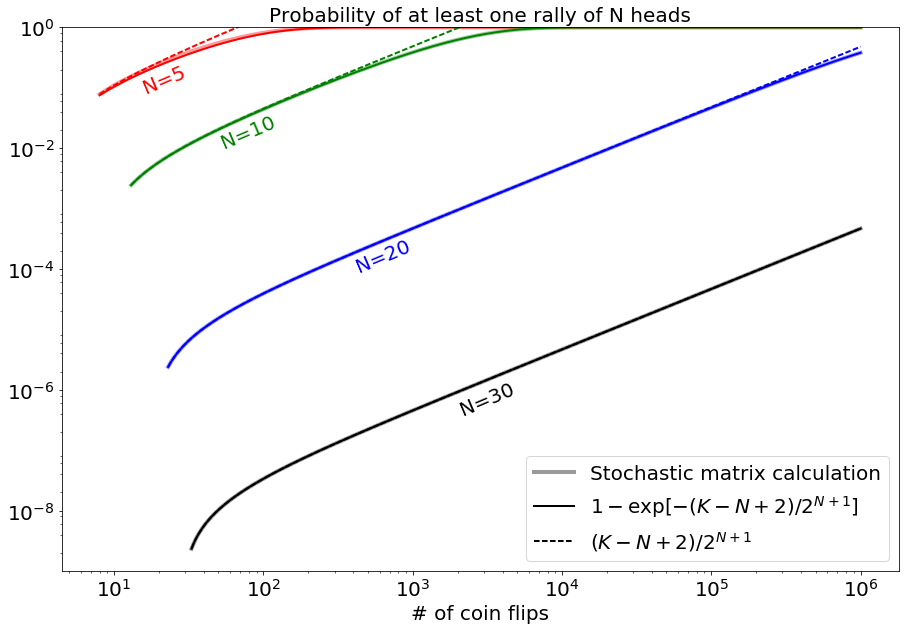

In [9]:
plt.figure(figsize=(15,10))
colors = ['Red','Green','Blue','Black']
FSZ = 20
ymin = 1e-9

for i,run in enumerate(Run_length):
    plt.loglog(xaxis[i][(run+1):],Numerical[i][(run+1):],color=colors[i],lw =4, alpha = 0.4)#,label = 'x='+str(run))
    plt.loglog(xaxis[i][(run+1):],Exponential[i][(run+1):],color=colors[i],lw = 2,ls = '-')#,label="Analytical")
    plt.loglog(xaxis[i][(run+1):],TaylorExpansion[i][(run+1):],color=colors[i],lw = 2,ls = '--')#,label="Analytical")

plt.ylim([ymin,1])
plt.xlabel("# of coin flips",fontsize = FSZ)
plt.title("Probability of at least one rally of N heads",fontsize = FSZ)
plt.xticks([10**i for i in range(1,int(np.ceil(np.log10(TotalTrials)))+1 )], fontsize = FSZ)
plt.yticks([10**i for i in range(0,int(np.log10(ymin)) ,-2) ], fontsize = FSZ)

plt.text(15, 0.15, 'N=5',rotation=23, color=colors[0], fontsize=FSZ)
plt.text(50, 0.022, 'N=10',rotation=23, color=colors[1], fontsize=FSZ)
plt.text(400, 0.02*1e-2, 'N=20',rotation=23, color=colors[2], fontsize=FSZ)
plt.text(2000, 0.085*1e-5, 'N=30',rotation=23, color=colors[3], fontsize=FSZ)

fatline = mlines.Line2D([], [], color='Black',lw =4, alpha = 0.4, label = 'Stochastic matrix calculation' )
solidline = mlines.Line2D([], [], color='Black',lw =2, ls = '-', label = '$1-\exp[-(K-N+2)/2^{N+1}]$')
brokenline = mlines.Line2D([], [], color='Black',lw =2, ls = '--', label = '$(K-N+2)/2^{N+1}$')

plt.legend(handles=[fatline,solidline,brokenline],loc='lower right',fontsize = FSZ )

plt.show()

The Taylor expansion is in good agreement with the numerical solution as long as $P\lesssim 0.1$. So the first step is to calculate $(K-N+2)/2^{N+1}$ and only if the result is larger than $0.1$ I will switch to the exponential expression. To confirm that the exponential expression performs well as $K$ increases, I calculate the relative error between the numerical solution and the exponential expression.

$\text{Error} = \frac{\vert P_{\text{Exponential}}-P_{\text{Numerical}}\vert}{P_{\text{Numerical}}}$

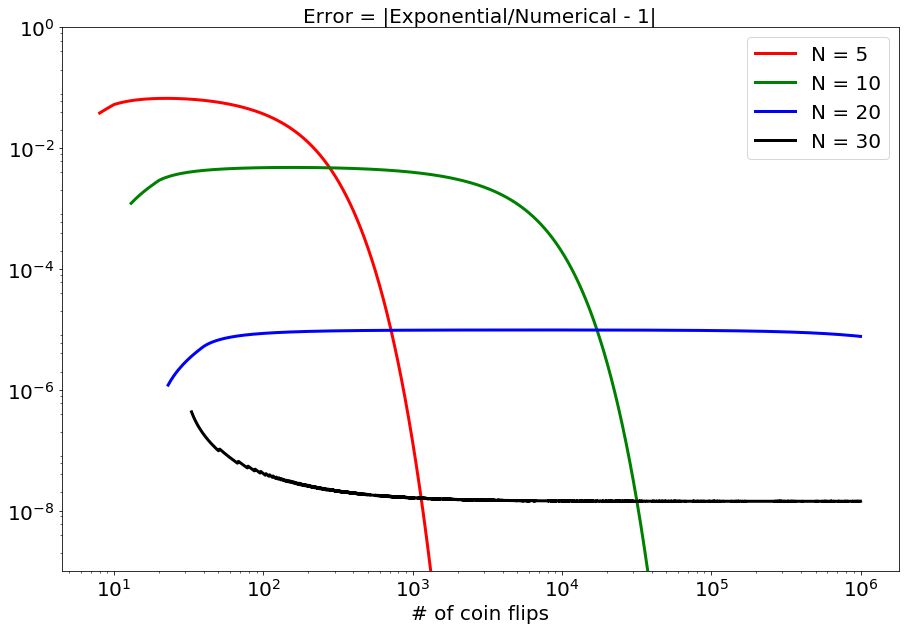

In [10]:
Relative_error_Exponential= []
for a,t,n in zip(Exponential,TaylorExpansion,Numerical):
    Relative_error_Exponential.append([ np.abs(a[i]/(n[i]+1e-15) - 1) for i in range(0,len(n))])

plt.figure(figsize=(15,10))
for i,run in enumerate(Run_length): 
    plt.loglog(xaxis[i][(run+1):],Relative_error_Exponential[i][(run+1):],color= colors[i], lw = 3, label = 'N = '+str(run))

ymin_err = 1e-9
plt.ylim([ymin_err,1])
plt.xlabel('# of coin flips',fontsize = FSZ)
plt.title('Error = |Exponential/Numerical - 1|',fontsize = FSZ)
plt.legend(loc='upper right',fontsize = FSZ )
plt.xticks([10**i for i in range(1,int(np.ceil(np.log10(TotalTrials)))+1 )], fontsize = FSZ)
plt.yticks([10**i for i in range(0,int(np.log10(ymin_err)),-2) ], fontsize = FSZ)

plt.show()

###  Appendix: Exact answer using the Fibonacci N-step sequence

__Looking backward:__

Let $S_K$ be the number of sequences of $K$ tosses that don't have $N$ consecutive heads, $S_{K,H}$ the portion of $S_K$ that ends in heads, and $S_{K,T}$ the portion of $S_K$ that ends in tails. By definition then: 

$S_K=S_{K,H}+S_{K,T}=
\underbrace{S_{K−1,H}+S_{K-1,T}}_{S_{K,H}}+S_{K,T}=
\underbrace{S_{K−2,H}+S_{K-2,T}}_{S_{K−1,H}}+S_{K-1,T}+S_{K,T}=\ldots\text{until}\ldots=\underbrace{S_{K−N+1,T}}_{S_{K−N+2,H}}+\sum_{i=0}^{N-2}S_{K-i,T}=
\sum_{i=0}^{N-1}S_{K-i,T}$ 


To end in tails, you just have to come from a sequence one shorter, so $S_{K,T}=S_{K−1}$. This yields:

$S_K=\sum_{i=0}^{N-1}S_{K-1-i}\Rightarrow S_{K}=\sum_{i=1}^{N}S_{K-i}$

This is the Fibonacci N-step sequence.

__Looking forward:__

* After $K=1$ tosses I have two possible sequences, $H$ and $T$, so $S_1 = F_{1+2}^{(N)} = 2$. 

* After $K<N$ tosses I have $2^K$ possible sequeces $S_{K<N} = F_{K+2}^{(N)} = 2^{K}$.

* After $K=N$ tosses I have $2^K-1$ possible sequeces $S_{K=N} = F_{K+2}^{(N)} = 2^{K}-1$.

* After $K>N$ I can use the expression $S_{K}=\sum_{i=1}^{N}S_{K-i}$.

So, after $K$ coin tosses I have $S_K = F_{K+2}^{(N)}$ sequences with no rally of $N$ heads. Therefore, the probability of one rally of $N$ heads is:

$P = 1- F_{K+2}^{(N)}/2^K$